In [1]:
import pandas as pd

df =  pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [10]:
# Feature Engineering

# 'Age'
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

# 'Total_Children'
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 'Total_Expense'
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Expenses'] = df[[col for col in cols if col in df.columns]].sum(axis=1)

# 'Total_Transactions'
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Transactions'] = df[[col for col in cols if col in df.columns]].sum(axis=1)

In [4]:
# Deleted coulumn
df.drop(columns=["Unnamed: 0", "Z_CostContact", "Z_Revenue"], inplace=True)

# Fill
df["Income"].fillna(df["Income"].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7028\1369186558.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


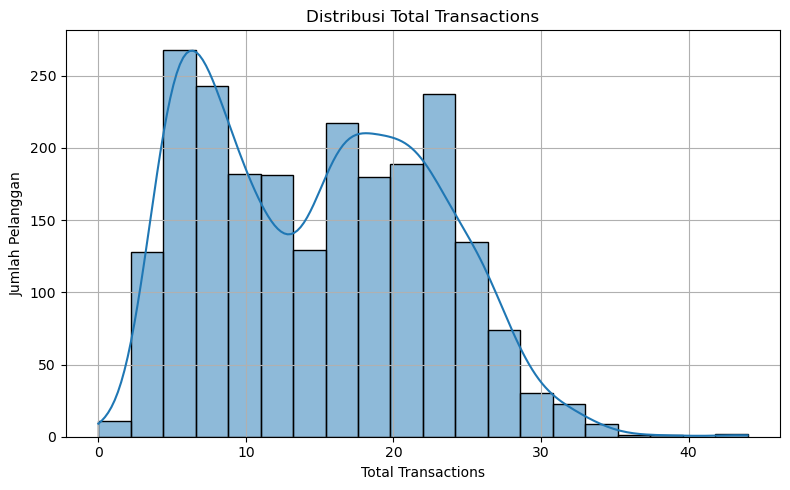

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Transactions'], bins=20, kde=True)
plt.title("Distribusi Total Transactions")
plt.xlabel("Total Transactions")
plt.ylabel("Jumlah Pelanggan")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Buat kelompok
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 30, 50, 100], labels=["<30", "30-50", "50+"])
df["Income_Group"] = pd.qcut(df["Income"], q=3, labels=["Low", "Medium", "High"])
df["Spending_Group"] = pd.qcut(df["Total_Expenses"], q=3, labels=["Low", "Medium", "High"])

# Fungsi conversion rate
def compute_conversion_rate(df, group_col):
    return (
        df.groupby(group_col)
          .agg(Total_Customers=("Response", "count"),
               Responded=("Response", "sum"))
          .assign(Conversion_Rate=lambda x: x["Responded"] / x["Total_Customers"])
          .reset_index()
    )

# Hitung conversion rate
print("Conversion Rate by Age Group")
print(compute_conversion_rate(df, "Age_Group"))
print("\nConversion Rate by Income Group")
print(compute_conversion_rate(df, "Income_Group"))
print("\nConversion Rate by Spending Group")
print(compute_conversion_rate(df, "Spending_Group"))

Conversion Rate by Age Group
  Age_Group  Total_Customers  Responded  Conversion_Rate
0       <30                7          2         0.285714
1     30-50              771        118         0.153048
2       50+             1459        214         0.146676

Conversion Rate by Income Group
  Income_Group  Total_Customers  Responded  Conversion_Rate
0          Low              747         86         0.115127
1       Medium              746         75         0.100536
2         High              747        173         0.231593

Conversion Rate by Spending Group
  Spending_Group  Total_Customers  Responded  Conversion_Rate
0            Low              749         45         0.060080
1         Medium              745        107         0.143624
2           High              746        182         0.243968


C:\Users\USER\AppData\Local\Temp\ipykernel_7028\2724292056.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7028\2724292056.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7028\2724292056.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)
